**Лабораторная работа №2 часть 3**

**Скачиваем датасет horse-or-human**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/"

Mounted at /content/drive
 BostonHousing.csv   house.jpg
 car.jpg	     patientid_cellmapping_parasitized.csv
 cat.jpg	    'patientid_cellmapping_uninfected (1).csv'
 cell_images	     plane.jpg
 cell_images.zip     ship.jpg
'Colab Notebooks'    test.csv
 dog.jpg	     train.csv
 horse.jpg


In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

--2021-12-04 18:18:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   100MB/s    in 1.4s    

2021-12-04 18:18:55 (100 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-12-04 18:19:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  24.4MB/s    in 0.4s    

2021-12-04 18:19:09 (24.4 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
!unzip horse-or-human.zip

Archive:  horse-or-human.zip
  inflating: horses/horse01-0.png    
  inflating: horses/horse01-1.png    
  inflating: horses/horse01-2.png    
  inflating: horses/horse01-3.png    
  inflating: horses/horse01-4.png    
  inflating: horses/horse01-5.png    
  inflating: horses/horse01-6.png    
  inflating: horses/horse01-7.png    
  inflating: horses/horse01-8.png    
  inflating: horses/horse01-9.png    
  inflating: horses/horse02-0.png    
  inflating: horses/horse02-1.png    
  inflating: horses/horse02-2.png    
  inflating: horses/horse02-3.png    
  inflating: horses/horse02-4.png    
  inflating: horses/horse02-5.png    
  inflating: horses/horse02-6.png    
  inflating: horses/horse02-7.png    
  inflating: horses/horse02-8.png    
  inflating: horses/horse02-9.png    
  inflating: horses/horse03-0.png    
  inflating: horses/horse03-1.png    
  inflating: horses/horse03-2.png    
  inflating: horses/horse03-3.png    
  inflating: horses/horse03-4.png    
  inflating: horses/h

In [ ]:
!unzip validation-horse-or-human.zip

Archive:  validation-horse-or-human.zip
  inflating: horses/horse1-000.png   
  inflating: horses/horse1-105.png   
  inflating: horses/horse1-122.png   
  inflating: horses/horse1-127.png   
  inflating: horses/horse1-170.png   
  inflating: horses/horse1-204.png   
  inflating: horses/horse1-224.png   
  inflating: horses/horse1-241.png   
  inflating: horses/horse1-264.png   
  inflating: horses/horse1-276.png   
  inflating: horses/horse1-298.png   
  inflating: horses/horse1-335.png   
  inflating: horses/horse1-384.png   
  inflating: horses/horse1-411.png   
  inflating: horses/horse1-436.png   
  inflating: horses/horse1-455.png   
  inflating: horses/horse1-484.png   
  inflating: horses/horse1-510.png   
  inflating: horses/horse1-539.png   
  inflating: horses/horse1-554.png   
  inflating: horses/horse1-568.png   
  inflating: horses/horse2-011.png   
  inflating: horses/horse2-040.png   
  inflating: horses/horse2-069.png   
  inflating: horses/horse2-112.png   
  inflatin

In [ ]:
!mkdir HorseOrHuman

In [ ]:
!cp -r /content/horses /content/HorseOrHuman/horses

In [ ]:
!cp -r /content/humans /content/HorseOrHuman/humans

**Подключаем нужные библиотеки, задаём константы**

In [ ]:
import shutil
import os

In [ ]:
# Каталог с набором данных
data_dir = "/content/HorseOrHuman"
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Часть набора данных для тестирования
test_portion = 0.15
# Часть набора данных для проверки
val_portion = 0.15
# Количество элементов данных в одном классе 
nb_images = 628

**Создaем каталоги для выборок**

Функция создания каталога с двумя подкаталогами по названию классов: horses и humans

In [ ]:
def create_directory(dir_name):
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)
  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "horses"))
  os.makedirs(os.path.join(dir_name, "humans"))

Создание структуры каталогов для обучающего, проверочного и тестового набора данных

In [ ]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

**Заполняем созданные каталоги**

Переименовываем файлы

In [ ]:
i = 0
for filename in os.listdir("/content/HorseOrHuman/horses"):
  # print(filename)
  os.rename(f"/content/HorseOrHuman/horses/{filename}", f"/content/HorseOrHuman/horses/horse{i}.png")
  i+=1
print(i)

628


In [ ]:
i = 0
for filename in os.listdir("/content/HorseOrHuman/humans"):
  # print(filename)
  os.rename(f"/content/HorseOrHuman/humans/{filename}", f"/content/HorseOrHuman/humans/human{i}.png")
  i+=1
print(i)

655


Функция копирования изображений в заданный каталог. Изображения лошадей и людей копируются в отдельные подкаталоги

In [ ]:
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "horses/horse" + str(i) + ".png"), 
                    os.path.join(dest_dir, "horses"))
        shutil.copy2(os.path.join(source_dir, "humans/human" + str(i) + ".png"), 
                   os.path.join(dest_dir, "humans"))

Расчет индексов наборов данных для обучения, проверки и тестирования

In [ ]:
start_val = int(nb_images * (1 - val_portion - test_portion))
start_tst = int(nb_images * (1 - test_portion))
print(start_val)
print(start_tst)

439
533


Копирования изображений

In [ ]:
copy_images(0, start_val, data_dir, train_dir)

In [ ]:
copy_images(start_val, start_tst, data_dir, val_dir)

In [ ]:
copy_images(start_tst, nb_images, data_dir, test_dir)

**Создаём генератор изображений**

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Activation, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.optimizers import Adam

**Обучение сети**

In [ ]:
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 2
batch_size = 128
nb_train = 878
nb_val   = 188
nb_test  = 190

In [ ]:
densenet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
densenet201.trainable=False

74850304/74836368 [==============================] - 1s 0us/step


**Сеть DenseNet201**

In [ ]:
densenet201.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1/conv[0][0]']   

**Создаем составную сеть**

In [ ]:
model_horses_or_humans = Sequential()
model_horses_or_humans.add(densenet201)
model_horses_or_humans.add(Flatten())
model_horses_or_humans.add(Dense(256))
model_horses_or_humans.add(Activation('relu'))
model_horses_or_humans.add(Dropout(0.5))
model_horses_or_humans.add(Dense(1000))
model_horses_or_humans.add(Activation('sigmoid'))

In [ ]:
model_horses_or_humans.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 flatten_2 (Flatten)         (None, 30720)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               7864576   
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_5 (Activation)   (None, 1)                

**Компилируем составную сеть**

In [ ]:
model_horses_or_humans.compile(loss='binary_crossentropy',
optimizer=Adam(lr=1e-5),
metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
datagen = ImageDataGenerator()

Генератор данных для обучения на основе изображений из каталога

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 878 images belonging to 2 classes.


Генератор данных для проверки на основе изображений из каталога

In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.


Генератор данных для тестирования на основе изображений из каталога

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 190 images belonging to 2 classes.


In [ ]:
import glob
from PIL import Image

images = glob.glob("/content/train/humans/*.png")

for image in images:
    with open(image, 'rb') as file:
        im = Image.open(file)
        print(image, im.width, im.height, im.mode, im.format, type(im))

/content/train/humans/human351.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human38.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human47.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human59.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human121.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human55.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human426.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human184.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human148.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human172.png 300 300 RGBA PNG <class 'PIL.PngImagePlugin.PngImageFile'>
/content/train/humans/human177.png 300 300 RGBA PNG <class 'PIL.

**Обучаем составную сеть**

In [ ]:
model_horses_or_humans.fit_generator(train_generator, 
                    steps_per_epoch = nb_train // batch_size,
                    epochs = 5,
                    validation_data  = val_generator,
                    validation_steps = nb_val // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
6/6 [==============================] - 102s 14s/step - loss: 3.1782 - accuracy: 0.5680 - val_loss: 0.7825 - val_accuracy: 0.7656
Epoch 2/5
6/6 [==============================] - 81s 14s/step - loss: 1.8532 - accuracy: 0.6747 - val_loss: 0.3670 - val_accuracy: 0.8828
Epoch 3/5
6/6 [==============================] - 84s 14s/step - loss: 1.4256 - accuracy: 0.7680 - val_loss: 0.4137 - val_accuracy: 0.8438
Epoch 4/5
6/6 [==============================] - 81s 14s/step - loss: 1.1394 - accuracy: 0.8107 - val_loss: 0.3953 - val_accuracy: 0.9062
Epoch 5/5
6/6 [==============================] - 82s 14s/step - loss: 0.8466 - accuracy: 0.8133 - val_loss: 0.3574 - val_accuracy: 0.9375


**Проверяем качество работы составной сети**

In [ ]:
scores = model_horses_or_humans.evaluate_generator(test_generator, nb_test // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Аккуратность на тестовых данных: %.2f%%" %(scores[1]*100))

Аккуратность на тестовых данных: 92.97%


**Пример распознования**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
from keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

In [ ]:
img = image.load_img('/content/drive/MyDrive/horse.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

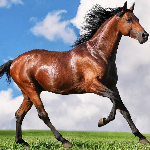

In [ ]:
img

In [ ]:
preds = model_horses_or_humans.predict(x)

In [ ]:
preds.shape

(1, 1000)

In [ ]:
print('Результаты распознавания: ', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Результаты распознавания:  [('n04070727', 'refrigerator', 0.9255314), ('n03017168', 'chime', 0.91240513), ('n03131574', 'crib', 0.9118118)]


In [ ]:
img = image.load_img('/content/drive/MyDrive/human.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

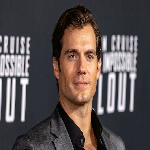

In [ ]:
img

In [ ]:
preds = model_horses_or_humans.predict(x)

In [ ]:
print('Результаты распознавания: ', decode_predictions(preds, top=3)[0])

Результаты распознавания:  [('n01796340', 'ptarmigan', 0.96161526), ('n01824575', 'coucal', 0.91879433), ('n04479046', 'trench_coat', 0.90363675)]
